In [2]:
# Load data
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
import project_env
from imp import reload
import math
import os
import run_logreg
import project_env
from sklearn.metrics import precision_recall_curve

reload(project_env)
reload(run_logreg)

%matplotlib inline
# Load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn
from sklearn.metrics import precision_recall_curve


import project_env as pe

%matplotlib inline

from os import listdir
from os.path import isfile, join
import string

data_path = 'per_station_test'
station_files = sorted([f for f in listdir(data_path) if isfile(join(data_path, f))])
station_files = list(filter(lambda f: 'swp' not in f, station_files))



#Empty

In [3]:
class Logistic_Regression_Specs():
    def __init__(self, split_data, stationid, target, empty=True, squares=False, num_append=0, C=1e5, penalty='l2'):
        self.stationid = stationid
        self.target = target
        self.split_data = split_data
        self.empty = empty
        self.squares = squares
        self.num_append = num_append
        self.penalty = penalty
        self.C = C

In [4]:
def construct_key(spec):
    key = ''
    if spec.target != 'y_60m':
        key = key + spec.target + ' '
    if spec.squares == True:
        key = key + 'squares; '
    if spec.num_append > 0:
        key = key + 'append: ' + str(spec.num_append) + '; '
    key = key + 'penalty: ' + spec.penalty + '; '
    key = key + 'c: ' + str(spec.C) + '; '
    return key

In [5]:
def run_models(list_of_specs):
    '''Creates a dictionary of models based on list of specs objects'''
    
    logregs = {}
    scalers = {}
    predictions = {}
    specs = {}
    
    for spec in list_of_specs:
        logregs[construct_key(spec)], scalers[construct_key(spec)], predictions[construct_key(spec)] = run_logreg.do_logreg(spec, plot = False) 
        specs[(construct_key(spec))] = spec
    return logregs, scalers, predictions, specs

In [6]:
def pr_curve(predictions, actual,  label):
    curve = precision_recall_curve(actual, predictions)
    precision, recall, thresholds = curve
    mp, mr, mt = pe.max_precision_for_recall(curve)
    print('Model', label)
    print('  Max precision:', mp, 'at recall', mr)
    print('  Threshold of max precision:', mt)
    plt.plot(recall, precision, label=label)

# Empty

Model y_10m
  Max precision: 0.784688995215 at recall 0.953488372093
  Threshold of max precision: 0.493574207767
Model y_15m
  Max precision: 0.679324894515 at recall 0.952662721893
  Threshold of max precision: 0.425892276076
Model y_30m
  Max precision: 0.429347826087 at recall 0.951807228916
  Threshold of max precision: 0.175866720198
Model y_45m
  Max precision: 0.332603938731 at recall 0.955974842767
  Threshold of max precision: 0.177197831887
Model y_60m
  Max precision: 0.312992125984 at recall 0.952095808383
  Threshold of max precision: 0.241029052629
Model y_90m
  Max precision: 0.2464 at recall 0.950617283951
  Threshold of max precision: 0.276198775843
Model y_120m
  Max precision: 0.231391585761 at recall 0.953333333333
  Threshold of max precision: 0.37504276027


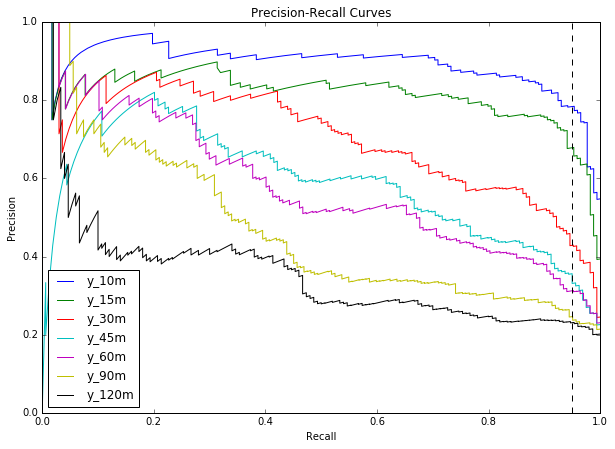

In [29]:
target_vars = ['y_10m','y_15m','y_30m','y_45m','y_60m','y_90m','y_120m']
columns=['mp_min', 'mp_max','mp_avg','mp_med','mt_min', 'mt_max','mt_avg','mt_med']
empty = {}
empty['y_10m'] = .01
empty['y_15m'] = .01
empty['y_30m'] = .1
empty['y_45m'] = 10
empty['y_60m'] = 10
empty['y_90m'] = 1000
empty['y_120m'] = 1000
empty_all = pd.DataFrame(data=np.zeros((len(target_vars),len(columns))), \
                                  index=target_vars,
                                 columns=columns) 

station_files = ['519.csv']

plt.figure(figsize=(10,7))

for x in target_vars:
    mp_list=[]
    mt_list=[]
    
    for s in station_files:
        try:
            #print(station_id)
            station_id = s.replace('.csv', '')

            data = pe.load_split_bucket(station_id, target=x, log=False)
            
            data = pe.binarize(data, -1) 

            # merge test
            train_X, train_y = data['train']
            dev_X, dev_y = data['dev']
            test_X, test_y = data['test']

            merged_X = pd.concat([train_X, dev_X])
            merged_y = pd.concat([train_y, dev_y])
            #print(merged_X.shape)
            #print(merged_y.shape)
    
            logreg = LogisticRegression(penalty='l1', C=empty[x])
            scaler = sklearn.preprocessing.StandardScaler()
            
            merged_X_scaled = scaler.fit_transform(merged_X)
            
            logreg.fit(merged_X_scaled, merged_y)

            test_X_scaled = scaler.transform(test_X)
    
            test_pred = logreg.predict(test_X_scaled)
            test_decision = logreg.predict_proba(test_X_scaled)[:,1]
            

            gold_labels = data['test'][1]
            
            #plt.figure(figsize=(12, 12))
            pr_curve(test_decision,gold_labels,x)
            
        except IndexError:
            continue
        except ValueError:
            continue

plt.axvline(x=.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title('Precision-Recall Curves')
plt.savefig('Empty 519 Final.png')
plt.show()


# Full

Model y_10m
  Max precision: 0.695035460993 at recall 0.95145631068
  Threshold of max precision: 0.310706391708
Model y_15m
  Max precision: 0.62 at recall 0.958762886598
  Threshold of max precision: 0.280665074819
Model y_30m
  Max precision: 0.537142857143 at recall 0.959183673469
  Threshold of max precision: 0.238650722999
Model y_45m
  Max precision: 0.527607361963 at recall 0.955555555556
  Threshold of max precision: 0.045782927869
Model y_60m
  Max precision: 0.366141732283 at recall 0.958762886598
  Threshold of max precision: 0.0178042435416
Model y_90m
  Max precision: 0.214285714286 at recall 0.958762886598
  Threshold of max precision: 0.0237888731561
Model y_120m
  Max precision: 0.182879377432 at recall 0.959183673469
  Threshold of max precision: 0.0234562834062


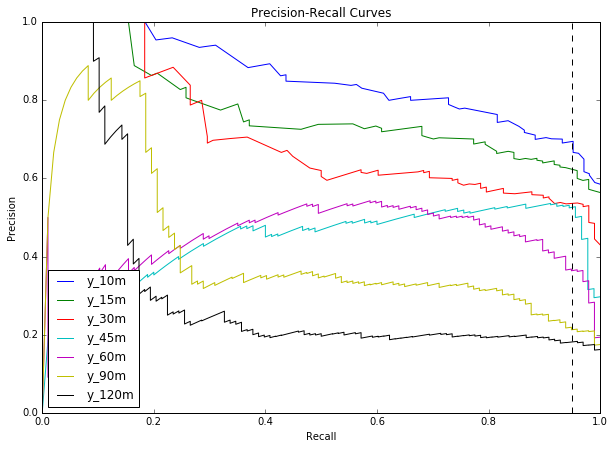

In [30]:
target_vars = ['y_10m','y_15m','y_30m','y_45m','y_60m','y_90m','y_120m']
columns=['mp_min', 'mp_max','mp_avg','mp_med','mt_min', 'mt_max','mt_avg','mt_med']
empty = {}
empty['y_10m'] = .01
empty['y_15m'] = .01
empty['y_30m'] = .01
empty['y_45m'] = 1000
empty['y_60m'] = 1000
empty['y_90m'] = 0.1
empty['y_120m'] = 1
empty_all = pd.DataFrame(data=np.zeros((len(target_vars),len(columns))), \
                                  index=target_vars,
                                 columns=columns) 

plt.figure(figsize=(10,7))

station_files = ['519.csv']
for x in target_vars:
    mp_list=[]
    mt_list=[]
    
    for s in station_files:
        try:
            #print(station_id)
            station_id = s.replace('.csv', '')

            data = pe.load_split_bucket(station_id, target=x, log=False)
            
            data = pe.binarize(data, 1) 

            # merge test
            train_X, train_y = data['train']
            dev_X, dev_y = data['dev']
            test_X, test_y = data['test']

            merged_X = pd.concat([train_X, dev_X])
            merged_y = pd.concat([train_y, dev_y])
            #print(merged_X.shape)
            #print(merged_y.shape)
    
            logreg = LogisticRegression(penalty='l1', C=empty[x])
            scaler = sklearn.preprocessing.StandardScaler()
            
            merged_X_scaled = scaler.fit_transform(merged_X)
            
            logreg.fit(merged_X_scaled, merged_y)

            test_X_scaled = scaler.transform(test_X)
    
            test_pred = logreg.predict(test_X_scaled)
            test_decision = logreg.predict_proba(test_X_scaled)[:,1]
            

            gold_labels = data['test'][1]
            pr_curve(test_decision,gold_labels,x)
    
        except IndexError:
            continue
        except ValueError:
            continue

plt.axvline(x=.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title('Precision-Recall Curves')
plt.savefig('Full 519 Final.png')
plt.show()
            